### One-Way ANOVA in Python: 

One-way ANOVA (also known as “analysis of variance”) is a test that is used to find out whether there exists a statistically significant difference between the mean values of more than one group.

Hypothesis involved:

A one-way ANOVA has the below given null and alternative hypotheses:

    H0 (null hypothesis): μ1 = μ2 = μ3 = … = μk (It implies that the means of all groups are equal)
    H1 (alternative null hypothesis): There will be at least one group's mean that differs from the rest

In [3]:
from scipy.stats import f_oneway

In [4]:
football_team = [173, 175, 180, 178, 177, 185, 183, 182]
hockey_team = [177, 179, 180, 188, 177, 172, 171, 184, 180]
weightlifters_team = [172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170]

In [5]:
f_oneway(football_team, hockey_team, weightlifters_team)

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)

The F statistic and p-value turn out to be equal to 5.50005 and 0.01048 respectively. Since the p-value is less than 0.05 hence we would reject the null hypothesis. 
This implies that we have sufficient proof to say that there exists a difference in height of sportments in different groups by sport activities. 

In [6]:
football_team = [173, 175, 180, 178, 177, 185, 183, 182]
hockey_team = [173, 175, 180, 178, 177, 185, 183, 182]
weightlifters_team = [173, 175, 180, 178, 177, 185, 183, 182]

In [7]:
f_oneway(football_team, hockey_team, weightlifters_team)

F_onewayResult(statistic=0.0, pvalue=1.0)

## Computational Procedures for a One-Way ANOVA (manual)

In [2]:
import numpy as np

In [3]:
group1 = np.array([173, 175, 180, 178, 177, 185, 183, 182])
group2 = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
group3 = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

### The first step is find the SS for each group 

The first step in the computation is to add the scores in each column and compute the sum of the squared scores for each column. We also count the number of scores in each column, compute the mean by dividing the sum by the number of scores, and compute the sum of squares. 

We defined the sum of squares as the average squared deviation from the mean. However, there is an easier computational formula for the SS, which you learned in the section of this website that showed you how to compute the variance. Listed below is both the definitional formula (first part) and the computational formula (second part).

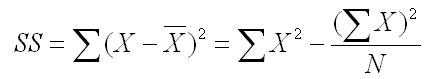

### The Raw Data

Here are the raw data from the three groups.

The first step in the computation is to add the scores in each column and compute the sum of the squared scores for each column. We also count the number of scores in each column, compute the mean by dividing the sum by the number of scores, and compute the sum of squares. 

We defined the sum of squares is the average squared deviation from the mean. However, there is an easier computational formula for the SS. Listed below is both the definitional formula (first part) and the computational formula (second part).

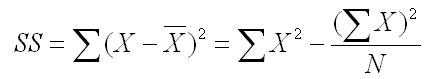

### Summary Statistics

We have done the computations described above for each of the three groups and organized them in three columns. We have also included a fourth column to put the total scores, total sum of X2, and total sample size, all of which will also be needed for the computations. In this way, we have all of the values that we will need for the computation of a one-way ANOVA at our fingertips.

In [4]:
group1 = np.array([173, 175, 180, 178, 177, 185, 183, 182])
group2 = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
group3 = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

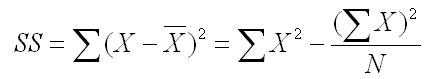

In [5]:
group1_len = len(group1)
sum_x = sum(group1)
sum_x_sq = sum(group1**2)
group1_mean = np.mean(group1)
SS_group1 = sum_x_sq - ((sum_x**2)/group1_len)
group2_len = len(group2)
sum_x2 = sum(group2)
sum_x_sq2 = sum(group2**2)
group2_mean = np.mean(group2)
SS_group2 = sum_x_sq2 - ((sum_x2**2)/group2_len)
group3_len = len(group3)
sum_x3 = sum(group3)
sum_x_sq3 = sum(group3**2)
group3_mean = np.mean(group3)
SS_group3 = sum_x_sq3 - ((sum_x3**2)/group3_len)
Sum_sum_xs = sum_x + sum_x2 + sum_x3
Sum_sum_x_sqs = sum_x_sq + sum_x_sq2 + sum_x_sq3
Groups_len = group1_len + group2_len + group3_len

print('Group 1:', 'Sum of X=%i'% sum_x, 'Sum of X2=%i'% sum_x_sq, 'n=%i'% group1_len, 'Mean=%f'% group1_mean, 'SS1=%f'% SS_group1)
print('Group 2:', 'Sum of X=%i'% sum_x2, 'Sum of X2=%i'% sum_x_sq2, 'n=%i'% group2_len, 'Mean=%f'% group2_mean, 'SS2=%f'% SS_group2)
print('Group 3:', 'Sum of X=%i'% sum_x3, 'Sum of X2=%i'% sum_x_sq3, 'n=%i'% group3_len, 'Mean=%f'% group3_mean, 'SS3=%f'% SS_group3)
print('Totals:', 'Sum of X 1 2 3 =', Sum_sum_xs, 'Sum of X2 1 2 3 = ', Sum_sum_x_sqs, 'n 1 2 3 = ', Groups_len)


Group 1: Sum of X=1433 Sum of X2=256805 n=8 Mean=179.125000 SS1=118.875000
Group 2: Sum of X=1608 Sum of X2=287524 n=9 Mean=178.666667 SS2=228.000000
Group 3: Sum of X=1900 Sum of X2=328412 n=11 Mean=172.727273 SS3=230.181818
Totals: Sum of X 1 2 3 = 4941 Sum of X2 1 2 3 =  872741 n 1 2 3 =  28


## Compute the SSs for the ANOVA

The formulas for computing the three sums of squares (between, within, and Total) are shown below, with the numbers plugged in. The notation may look complicated, but all of the needed values can be found in the summary table that we just prepared. The only real new terminology uses summation notation in which we sum across the groups (i, which refers to the group number, goes from 1 to k, which is the number of groups). We use this notation because we can have any number of groups in a design like this and we want a formula that will describe what we should do regardless of how many groups we have. 

Most students find it easier to understand the notation by looking at the formula and see where the numbers for the formula can be found in the summary table above. We have used more parentheses than actually needed algebraically to specify what needs to be done. The rule is that you always do things inside a parenthesis before you do things outside of the parenthesis. If you remember that simple rule, you will not have to remember the more complicated algebraic rules about what computations should be done first. 

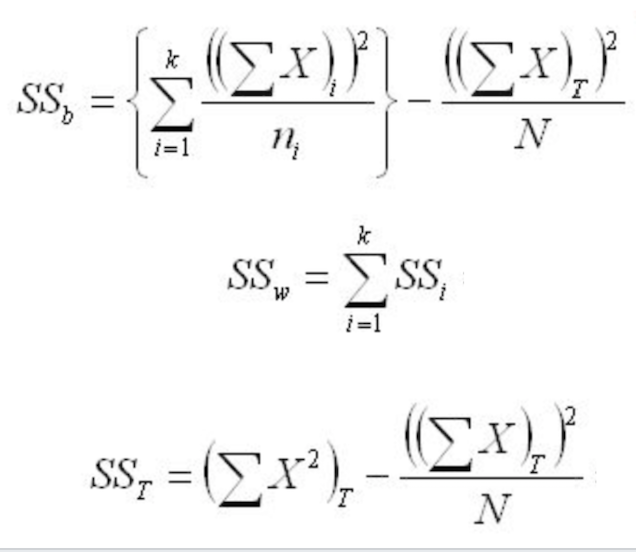

In [6]:
SSb = (sum_x **2 / group1_len + sum_x2 **2 / group2_len + sum_x3 **2 / group3_len) - (Sum_sum_xs**2/Groups_len)
SSb

253.9074675324373

In [7]:
SSw = SS_group1 + SS_group2 + SS_group3
SSw

577.0568181818235

In [8]:
SSt = Sum_sum_x_sqs - (Sum_sum_xs**2/Groups_len)
SSt

830.964285714319

Double check the computation of the SSs by seeing if they add up.  SST = SSb + SSw

In [9]:
SSt_test = SSb + SSw 
SSt_test

830.9642857142608

### Fill in the Summary Table

The dfb is equal to the number of groups (k) minus 1. 

The dfw is equal to the total number of sportsmens minus the number of groups (N - k). 

The dft is equal to the total number of sportsmens (N) minus 1. 

Note that the dfT is equal to the dfb plus the dfw in the same way that the SST is equal to the sum of the SSb and SSw.

In [10]:
k = 3
dfb = k - 1
all_groups_together = np.concatenate([group1, group2, group3])
num_of_sportsmens = len(all_groups_together)
dfw = num_of_sportsmens - k
dft = num_of_sportsmens - 1
print('dfb=%i'% dfb, 'dfw=%i'% dfw, 'dft=%i'% dft)
print('SSb=%f'% SSb, 'SSw=%f'% SSw, 'SSt=%f'% SSt)

dfb=2 dfw=25 dft=27
SSb=253.907468 SSw=577.056818 SSt=830.964286


The MSs are computed by dividing the SSs by their respective dfs, and the F is computed by dividing the MSb by the MSw. 

In [11]:
MSb = SSb/dfb
MSw = SSw/dfw
print(MSb, MSw)

126.95373376621865 23.08227272727294


In [12]:
F = MSb/MSw
F

5.500053450811888

The final step is to compare the value of the F computed in this analysis with the critical value of F in the F Table. You look up the critical value by using the degrees of freedom. In our case, the dfb is 2 and the dfw is 25. The critical value of F for an alpha of .05 is 3.34. Since our obtained F exceeds this value, we reject the null hypothesis and conclude that there is a significant difference between the groups.